In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.optimize import fsolve

#from f_detrend import detrend_fuction

sn.set_style('whitegrid')
%matplotlib inline

In [2]:
# Expanded and modivfied version (first column now string)
def read_table(filename,keyword='ciclo',rescale=1,ncols=5,start=2):
    t0 = start
    t1 = ncols+start
    results_follow = 0
    row_names = []
    table_raw = np.empty(t1-t0)
    f = open(filename,'r')
    for line in f:
        words = line.split()
        if len(words)>1 and words[0] == keyword:
            results_follow=1
            colnames = words[t0:t1]
        elif len(words)>1 and words[0] == "Total":
            break
        elif len(words)>1 and results_follow==1:
            row_names.append(words[0])
            buff_v = []
            for w in words[t0:t1]: 
                w = w.replace(",","")
                buff_v.append(w)
            table_raw = np.vstack((table_raw,np.array(buff_v,dtype=float)/rescale))
    table_raw = table_raw[1:,:]
    return pd.DataFrame(table_raw, columns=colnames,index=np.array(row_names))

In [8]:
dates = []
for year in range(1987,2023):
    for quarter in range(1,5):
        dates.append(str(year)+"Q"+str(quarter))
dates = dates[1:]

t0 = 59
T = len(dates)
date_dict = dict(zip(range(t0,T+t0),dates))
date_dict_reverse = dict(zip(dates,range(0,T)))
date_dict_reverse_ciclo = dict(zip(dates,range(t0,T+t0)))

# Parent Age 35-40

 ## Children Age <5

In [12]:
coefs_par_a3045_p5 = []
coefs_mar_a3045_p5 = []
coefs_parxmar_a3045_p5 = []
coefs_div_a3045_p5 = []
bounds_par_a3045_p5 = []
bounds_mar_a3045_p5 = []
bounds_parxmar_a3045_p5 = []
bounds_div_a3045_p5 = []
qs = []
cc = 130
f = open('./regtabs/prob_perm_stocks_w_age3540_parent_5_cohab.log','r')
for line in f:
    words = line.split()
    #print(words)
    if  len(words)>1 and words[0]=='permanent' and words[1]=='|':
        #indx_if = words.index("if")
        #ciclo = int(words[indx_if+1][7:10])
        ciclo = cc
        qs.append(date_dict[ciclo])
        cc +=1
    if len(words)>0 and 'parent_5'==words[0]:
        coefs_par_a3045_p5.append(float(words[2]))
        bounds_par_a3045_p5.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'married'==words[0]:
        coefs_mar_a3045_p5.append(float(words[2]))
        bounds_mar_a3045_p5.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'married_parent_5'==words[0]:
        coefs_parxmar_a3045_p5.append(float(words[2]))
        bounds_parxmar_a3045_p5.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'divorced'==words[0]:
        coefs_div_a3045_p5.append(float(words[2]))
        bounds_div_a3045_p5.append((float(words[-2]),float(words[-1])))
bounds_par_a3045_p5 = np.array(bounds_par_a3045_p5)
coefs_par_a3045_p5 = np.array(coefs_par_a3045_p5)
bounds_mar_a3045_p5 = np.array(bounds_mar_a3045_p5)
coefs_mar_a3045_p5 = np.array(coefs_mar_a3045_p5)
bounds_parxmar_a3045_p5 = np.array(bounds_parxmar_a3045_p5)
coefs_parxmar_a3045_p5 = np.array(coefs_parxmar_a3045_p5)
bounds_div_a3045_p5 = np.array(bounds_div_a3045_p5)
coefs_div_a3045_p5 = np.array(coefs_div_a3045_p5)

In [25]:
coefs_m_par_a3045_p5 = []
coefs_m_mar_a3045_p5 = []
coefs_m_parxmar_a3045_p5 = []
coefs_m_div_a3045_p5 = []
bounds_m_par_a3045_p5 = []
bounds_m_mar_a3045_p5 = []
bounds_m_parxmar_a3045_p5 = []
bounds_m_div_a3045_p5 = []
f = open('./regtabs/prob_perm_stocks_m_age3540_parent_5_cohab.log','r')
for line in f:
    words = line.split()
    print(words)
    if len(words)>0 and 'parent_5'==words[0]:        
        coefs_m_par_a3045_p5.append(float(words[2]))
        bounds_m_par_a3045_p5.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'married'==words[0]:
        coefs_m_mar_a3045_p5.append(float(words[2]))
        bounds_m_mar_a3045_p5.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'married_parent_5'==words[0]:
        coefs_m_parxmar_a3045_p5.append(float(words[2]))
        bounds_m_parxmar_a3045_p5.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'divorced'==words[0]:
        coefs_m_div_a3045_p5.append(float(words[2]))
        bounds_m_div_a3045_p5.append((float(words[-2]),float(words[-1])))
bounds_m_par_a3045_p5 = np.array(bounds_m_par_a3045_p5)
coefs_m_par_a3045_p5 = np.array(coefs_m_par_a3045_p5)
bounds_m_mar_a3045_p5 = np.array(bounds_m_mar_a3045_p5)
coefs_m_mar_a3045_p5 = np.array(coefs_m_mar_a3045_p5)
bounds_m_parxmar_a3045_p5 = np.array(bounds_m_parxmar_a3045_p5)
coefs_m_parxmar_a3045_p5 = np.array(coefs_m_parxmar_a3045_p5)
bounds_m_div_a3045_p5 = np.array(bounds_m_div_a3045_p5)
coefs_m_div_a3045_p5 = np.array(coefs_m_div_a3045_p5)

['note:', 'erte', '!=', '0', 'predicts', 'failure', 'perfectly;']
['erte', 'omitted', 'and', '3', 'obs', 'not', 'used.']
[]
[]
['Logistic', 'regression', 'Number', 'of', 'obs', '=', '3,468']
['Wald', 'chi2(21)', '=', '343.90']
['Prob', '>', 'chi2', '=', '0.0000']
['Log', 'pseudolikelihood', '=', '-632022.21', 'Pseudo', 'R2', '=', '0.1413']
[]
['----------------------------------------------------------------------------------------------']
['|', 'Robust']
['permanent', '|', 'Odds', 'ratio', 'std.', 'err.', 'z', 'P>|z|', '[95%', 'conf.', 'interval]']
['-----------------------------+----------------------------------------------------------------']
['act', '|']
['manufactures,', 'prim.', '|', '8.778517', '3.301375', '5.78', '0.000', '4.20055', '18.34578']
['extractive', 'and', 'energy.', '|', '11.9408', '4.277077', '6.92', '0.000', '5.917539', '24.09492']
['manufactures,', 'sec.', '|', '8.283527', '3.119982', '5.61', '0.000', '3.959233', '17.33084']
['construction', '|', '2.104289', '.69

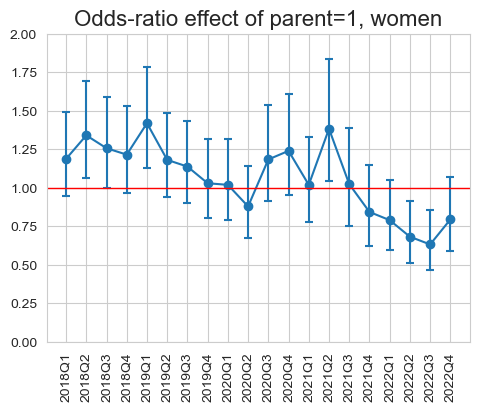

In [27]:
t0 = int(np.where(np.array(qs)=='2018Q1')[0])
colors = sn.color_palette()
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.title("Odds-ratio effect of parent=1, women",fontsize=16)
plt.plot(qs[t0:],coefs_par_a3045_p5[t0:],marker='o')
plt.scatter(qs[t0:],bounds_par_a3045_p5[t0:,0],marker='_',color=colors[0])
plt.scatter(qs[t0:],bounds_par_a3045_p5[t0:,1],marker='_',color=colors[0])
for i in range(coefs_par_a3045_p5[t0:].size):
    plt.plot((qs[t0:][i],qs[t0:][i]),(bounds_par_a3045_p5[t0:,:][i,0],bounds_par_a3045_p5[t0:,:][i,1]),c=colors[0])
plt.xticks(rotation=90)
plt.axhline(1,color='r',lw=1)
plt.ylim(0.0,2.)

# plt.subplot(122)
# plt.title("Odds-ratio effect of parent=1, men",fontsize=16)
# plt.plot(qs[t0:],coefs_m_par_a3045_p5[t0:],color=colors[2],marker='o')
# plt.scatter(qs[t0:],bounds_m_par_a3045_p5[t0:,0],marker='_',color=colors[2])
# plt.scatter(qs[t0:],bounds_m_par_a3045_p5[t0:,1],marker='_',color=colors[2])
# for i in range(coefs_m_par_a3045_p5[t0:].size):
#     plt.plot((qs[t0:][i],qs[t0:][i]),(bounds_m_par_a3045_p5[t0:,0][i],bounds_m_par_a3045_p5[t0:,1][i]),c=colors[2])
# plt.xticks(rotation=90)
# plt.axhline(1,color='r',lw=1)
# plt.ylim(0.6,1.6)
# plt.tight_layout()
# plt.savefig('./plots_logit/prob_womenVmen_parent_time_age3045_parent_5.pdf',format='pdf',bbox_inches='tight')
plt.show()

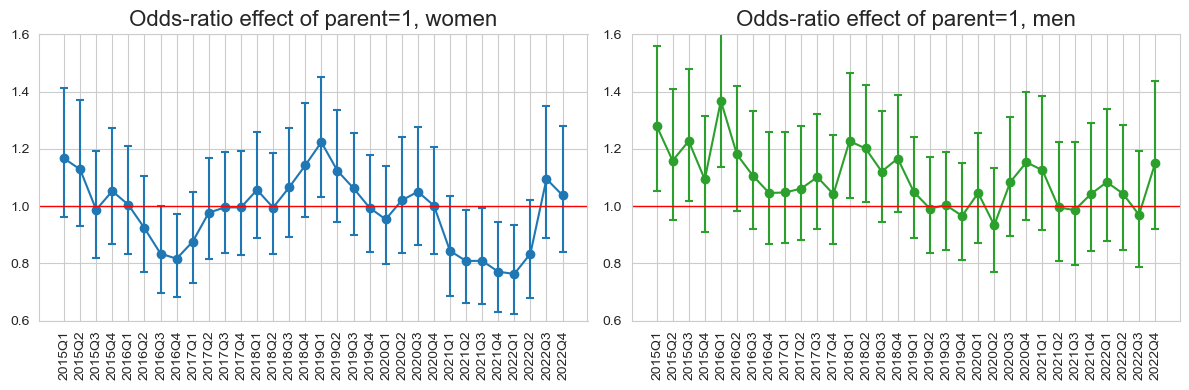

In [7]:
colors = sn.color_palette()
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.title("Odds-ratio effect of parent=1, women",fontsize=16)
plt.plot(qs,coefs_par_a3045_p5,marker='o')
plt.scatter(qs,bounds_par_a3045_p5[:,0],marker='_',color=colors[0])
plt.scatter(qs,bounds_par_a3045_p5[:,1],marker='_',color=colors[0])
for i in range(coefs_par_a3045_p5.size):
    plt.plot((qs[i],qs[i]),(bounds_par_a3045_p5[i,0],bounds_par_a3045_p5[i,1]),c=colors[0])
plt.xticks(rotation=90)
plt.axhline(1,color='r',lw=1)
plt.ylim(0.6,1.6)

plt.subplot(122)
plt.title("Odds-ratio effect of parent=1, men",fontsize=16)
plt.plot(qs,coefs_m_par_a3045_p5,color=colors[2],marker='o')
plt.scatter(qs,bounds_m_par_a3045_p5[:,0],marker='_',color=colors[2])
plt.scatter(qs,bounds_m_par_a3045_p5[:,1],marker='_',color=colors[2])
for i in range(coefs_m_par_a3045_p5.size):
    plt.plot((qs[i],qs[i]),(bounds_m_par_a3045_p5[i,0],bounds_m_par_a3045_p5[i,1]),c=colors[2])
plt.xticks(rotation=90)
plt.axhline(1,color='r',lw=1)
plt.ylim(0.6,1.6)
plt.tight_layout()
# plt.savefig('./plots_logit/prob_womenVmen_parent_time_age3045_parent_5.pdf',format='pdf',bbox_inches='tight')
plt.show()

## Children Age <10

In [30]:
coefs_par_a3045_p10 = []
coefs_mar_a3045_p10 = []
coefs_parxmar_a3045_p10 = []
coefs_div_a3045_p10 = []
bounds_par_a3045_p10 = []
bounds_mar_a3045_p10 = []
bounds_parxmar_a3045_p10 = []
bounds_div_a3045_p10 = []
qs = []
cc = 130
f = open('./regtabs/prob_perm_stocks_w_age3540_parent_10_cohab.log','r')
for line in f:
    words = line.split()
    #print(words)
    if  len(words)>1 and words[0]=='permanent' and words[1]=='|':
        #indx_if = words.index("if")
        #ciclo = int(words[indx_if+1][7:10])
        ciclo = cc
        qs.append(date_dict[ciclo])
        cc +=1
    if len(words)>0 and 'parent_10'==words[0]:
        coefs_par_a3045_p10.append(float(words[2]))
        bounds_par_a3045_p10.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'married'==words[0]:
        coefs_mar_a3045_p10.append(float(words[2]))
        bounds_mar_a3045_p10.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'married_parent_10'==words[0]:
        coefs_parxmar_a3045_p10.append(float(words[2]))
        bounds_parxmar_a3045_p10.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'divorced'==words[0]:
        coefs_div_a3045_p10.append(float(words[2]))
        bounds_div_a3045_p10.append((float(words[-2]),float(words[-1])))
bounds_par_a3045_p10 = np.array(bounds_par_a3045_p10)
coefs_par_a3045_p10 = np.array(coefs_par_a3045_p10)
bounds_mar_a3045_p10 = np.array(bounds_mar_a3045_p10)
coefs_mar_a3045_p10 = np.array(coefs_mar_a3045_p10)
bounds_parxmar_a3045_p10 = np.array(bounds_parxmar_a3045_p10)
coefs_parxmar_a3045_p10 = np.array(coefs_parxmar_a3045_p10)
bounds_div_a3045_p10 = np.array(bounds_div_a3045_p10)
coefs_div_a3045_p10 = np.array(coefs_div_a3045_p10)

In [31]:
coefs_m_par_a3045_p10 = []
coefs_m_mar_a3045_p10 = []
coefs_m_parxmar_a3045_p10 = []
coefs_m_div_a3045_p10 = []
bounds_m_par_a3045_p10 = []
bounds_m_mar_a3045_p10 = []
bounds_m_parxmar_a3045_p10 = []
bounds_m_div_a3045_p10 = []
f = open('./regtabs/prob_perm_stocks_m_age3540_parent_10.log','r')
for line in f:
    words = line.split()
    if len(words)>0 and 'parent_10'==words[0]:        
        coefs_m_par_a3045_p10.append(float(words[2]))
        bounds_m_par_a3045_p10.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'married'==words[0]:
        coefs_m_mar_a3045_p10.append(float(words[2]))
        bounds_m_mar_a3045_p10.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'married_parent_10'==words[0]:
        coefs_m_parxmar_a3045_p10.append(float(words[2]))
        bounds_m_parxmar_a3045_p10.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'divorced'==words[0]:
        coefs_m_div_a3045_p10.append(float(words[2]))
        bounds_m_div_a3045_p10.append((float(words[-2]),float(words[-1])))
bounds_m_par_a3045_p10 = np.array(bounds_m_par_a3045_p10)
coefs_m_par_a3045_p10 = np.array(coefs_m_par_a3045_p10)
bounds_m_mar_a3045_p10 = np.array(bounds_m_mar_a3045_p10)
coefs_m_mar_a3045_p10 = np.array(coefs_m_mar_a3045_p10)
bounds_m_parxmar_a3045_p10 = np.array(bounds_m_parxmar_a3045_p10)
coefs_m_parxmar_a3045_p10 = np.array(coefs_m_parxmar_a3045_p10)
bounds_m_div_a3045_p10 = np.array(bounds_m_div_a3045_p10)
coefs_m_div_a3045_p10 = np.array(coefs_m_div_a3045_p10)

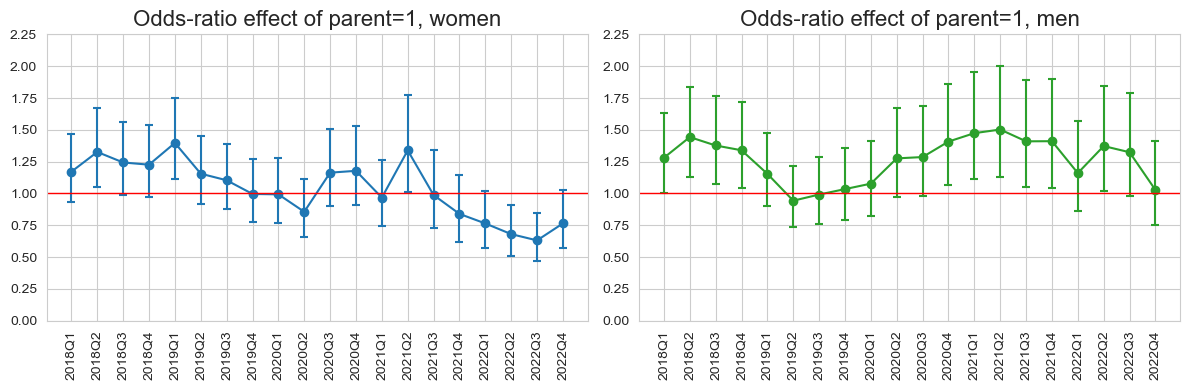

In [37]:
t0 = int(np.where(np.array(qs)=='2018Q1')[0])
colors = sn.color_palette()
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.title("Odds-ratio effect of parent=1, women",fontsize=16)
plt.plot(qs[t0:],coefs_par_a3045_p10[t0:],marker='o')
plt.scatter(qs[t0:],bounds_par_a3045_p10[t0:,0],marker='_',color=colors[0])
plt.scatter(qs[t0:],bounds_par_a3045_p10[t0:,1],marker='_',color=colors[0])
for i in range(coefs_par_a3045_p10[t0:].size):
    plt.plot((qs[t0:][i],qs[t0:][i]),(bounds_par_a3045_p10[t0:,0][i],bounds_par_a3045_p10[t0:,1][i]),c=colors[0])
plt.xticks(rotation=90)
plt.axhline(1,color='r',lw=1)
plt.ylim(0.0,2.25)

plt.subplot(122)
plt.title("Odds-ratio effect of parent=1, men",fontsize=16)
plt.plot(qs[t0:],coefs_m_par_a3045_p10[t0:],color=colors[2],marker='o')
plt.scatter(qs[t0:],bounds_m_par_a3045_p10[t0:,0],marker='_',color=colors[2])
plt.scatter(qs[t0:],bounds_m_par_a3045_p10[t0:,1],marker='_',color=colors[2])
for i in range(coefs_m_par_a3045_p10[t0:].size):
    plt.plot((qs[t0:][i],qs[t0:][i]),(bounds_m_par_a3045_p10[t0:,0][i],bounds_m_par_a3045_p10[t0:,1][i]),c=colors[2])
plt.xticks(rotation=90)
plt.axhline(1,color='r',lw=1)
plt.ylim(0.,2.25)
plt.tight_layout()
# plt.savefig('./plots_logit/prob_womenVmen_parent_time_age3045_parent_10.pdf',format='pdf',bbox_inches='tight')
plt.show()

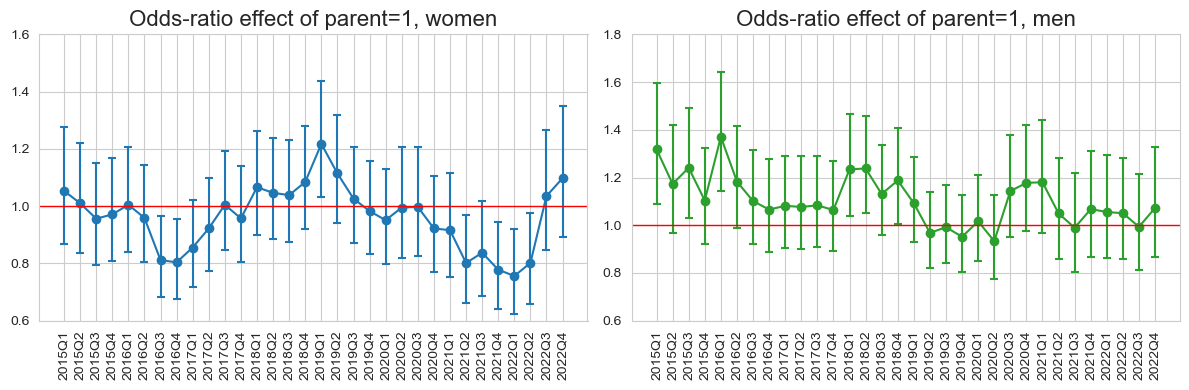

In [18]:
colors = sn.color_palette()
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.title("Odds-ratio effect of parent=1, women",fontsize=16)
plt.plot(qs,coefs_par_a3045_p10,marker='o')
plt.scatter(qs,bounds_par_a3045_p10[:,0],marker='_',color=colors[0])
plt.scatter(qs,bounds_par_a3045_p10[:,1],marker='_',color=colors[0])
for i in range(coefs_par_a3045_p10.size):
    plt.plot((qs[i],qs[i]),(bounds_par_a3045_p10[i,0],bounds_par_a3045_p10[i,1]),c=colors[0])
plt.xticks(rotation=90)
plt.axhline(1,color='r',lw=1)
plt.ylim(0.6,1.6)

plt.subplot(122)
plt.title("Odds-ratio effect of parent=1, men",fontsize=16)
plt.plot(qs,coefs_m_par_a3045_p10,color=colors[2],marker='o')
plt.scatter(qs,bounds_m_par_a3045_p10[:,0],marker='_',color=colors[2])
plt.scatter(qs,bounds_m_par_a3045_p10[:,1],marker='_',color=colors[2])
for i in range(coefs_m_par_a3045_p10.size):
    plt.plot((qs[i],qs[i]),(bounds_m_par_a3045_p10[i,0],bounds_m_par_a3045_p10[i,1]),c=colors[2])
plt.xticks(rotation=90)
plt.axhline(1,color='r',lw=1)
plt.ylim(0.6,1.8)
plt.tight_layout()
# plt.savefig('./plots_logit/prob_womenVmen_parent_time_age3045_parent_10.pdf',format='pdf',bbox_inches='tight')
plt.show()

## Children Age <15 

In [39]:
coefs_par_a3045_p15 = []
coefs_mar_a3045_p15 = []
coefs_parxmar_a3045_p15 = []
coefs_div_a3045_p15 = []
bounds_par_a3045_p15 = []
bounds_mar_a3045_p15 = []
bounds_parxmar_a3045_p15 = []
bounds_div_a3045_p15 = []
qs = []
cc = 130
f = open('./regtabs/prob_perm_stocks_w_age3540_parent_15_cohab.log','r')
for line in f:
    words = line.split()
    #print(words)
    if  len(words)>1 and words[0]=='permanent' and words[1]=='|':
        #indx_if = words.index("if")
        #ciclo = int(words[indx_if+1][7:10])
        ciclo = cc
        qs.append(date_dict[ciclo])
        cc +=1
    if len(words)>0 and 'parent_15'==words[0]:
        coefs_par_a3045_p15.append(float(words[2]))
        bounds_par_a3045_p15.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'married'==words[0]:
        coefs_mar_a3045_p15.append(float(words[2]))
        bounds_mar_a3045_p15.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'married_parent_15'==words[0]:
        coefs_parxmar_a3045_p15.append(float(words[2]))
        bounds_parxmar_a3045_p15.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'divorced'==words[0]:
        coefs_div_a3045_p15.append(float(words[2]))
        bounds_div_a3045_p15.append((float(words[-2]),float(words[-1])))
bounds_par_a3045_p15 = np.array(bounds_par_a3045_p15)
coefs_par_a3045_p15 = np.array(coefs_par_a3045_p15)
bounds_mar_a3045_p15 = np.array(bounds_mar_a3045_p15)
coefs_mar_a3045_p15 = np.array(coefs_mar_a3045_p15)
bounds_parxmar_a3045_p15 = np.array(bounds_parxmar_a3045_p15)
coefs_parxmar_a3045_p15 = np.array(coefs_parxmar_a3045_p15)
bounds_div_a3045_p15 = np.array(bounds_div_a3045_p15)
coefs_div_a3045_p15 = np.array(coefs_div_a3045_p15)

In [40]:
coefs_m_par_a3045_p15 = []
coefs_m_mar_a3045_p15 = []
coefs_m_parxmar_a3045_p15 = []
coefs_m_div_a3045_p15 = []
bounds_m_par_a3045_p15 = []
bounds_m_mar_a3045_p15 = []
bounds_m_parxmar_a3045_p15 = []
bounds_m_div_a3045_p15 = []
f = open('./regtabs/prob_perm_stocks_m_age3540_parent_15_cohab.log','r')
for line in f:
    words = line.split()
    if len(words)>0 and 'parent_15'==words[0]:        
        coefs_m_par_a3045_p15.append(float(words[2]))
        bounds_m_par_a3045_p15.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'married'==words[0]:
        coefs_m_mar_a3045_p15.append(float(words[2]))
        bounds_m_mar_a3045_p15.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'married_parent_15'==words[0]:
        coefs_m_parxmar_a3045_p15.append(float(words[2]))
        bounds_m_parxmar_a3045_p15.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'divorced'==words[0]:
        coefs_m_div_a3045_p15.append(float(words[2]))
        bounds_m_div_a3045_p15.append((float(words[-2]),float(words[-1])))
bounds_m_par_a3045_p15 = np.array(bounds_m_par_a3045_p15)
coefs_m_par_a3045_p15 = np.array(coefs_m_par_a3045_p15)
bounds_m_mar_a3045_p15 = np.array(bounds_m_mar_a3045_p15)
coefs_m_mar_a3045_p15 = np.array(coefs_m_mar_a3045_p15)
bounds_m_parxmar_a3045_p15 = np.array(bounds_m_parxmar_a3045_p15)
coefs_m_parxmar_a3045_p15 = np.array(coefs_m_parxmar_a3045_p15)
bounds_m_div_a3045_p15 = np.array(bounds_m_div_a3045_p15)
coefs_m_div_a3045_p15 = np.array(coefs_m_div_a3045_p15)

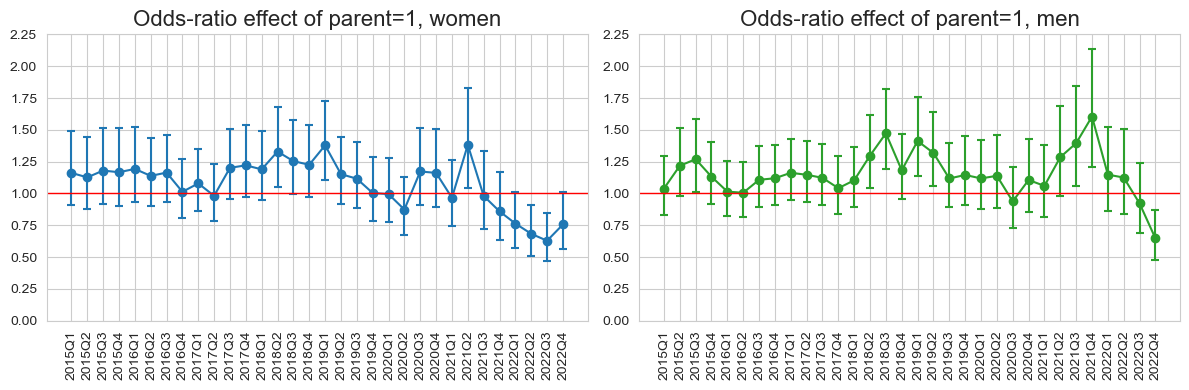

In [41]:
t0 = int(np.where(np.array(qs)=='2015Q1')[0])
colors = sn.color_palette()
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.title("Odds-ratio effect of parent=1, women",fontsize=16)
plt.plot(qs[t0:],coefs_par_a3045_p15[t0:],marker='o')
plt.scatter(qs[t0:],bounds_par_a3045_p15[t0:,0],marker='_',color=colors[0])
plt.scatter(qs[t0:],bounds_par_a3045_p15[t0:,1],marker='_',color=colors[0])
for i in range(coefs_par_a3045_p15[t0:].size):
    plt.plot((qs[t0:][i],qs[t0:][i]),(bounds_par_a3045_p15[t0:,0][i],bounds_par_a3045_p15[t0:,1][i]),c=colors[0])
plt.xticks(rotation=90)
plt.axhline(1,color='r',lw=1)
plt.ylim(0.0,2.25)

plt.subplot(122)
plt.title("Odds-ratio effect of parent=1, men",fontsize=16)
plt.plot(qs[t0:],coefs_m_par_a3045_p15[t0:],color=colors[2],marker='o')
plt.scatter(qs[t0:],bounds_m_par_a3045_p15[t0:,0],marker='_',color=colors[2])
plt.scatter(qs[t0:],bounds_m_par_a3045_p15[t0:,1],marker='_',color=colors[2])
for i in range(coefs_m_par_a3045_p15[t0:].size):
    plt.plot((qs[t0:][i],qs[t0:][i]),(bounds_m_par_a3045_p15[t0:,0][i],bounds_m_par_a3045_p15[t0:,1][i]),c=colors[2])
plt.xticks(rotation=90)
plt.axhline(1,color='r',lw=1)
plt.ylim(0.,2.25)
plt.tight_layout()
# plt.savefig('./plots_logit/prob_womenVmen_parent_time_age3045_parent_10.pdf',format='pdf',bbox_inches='tight')
plt.show()

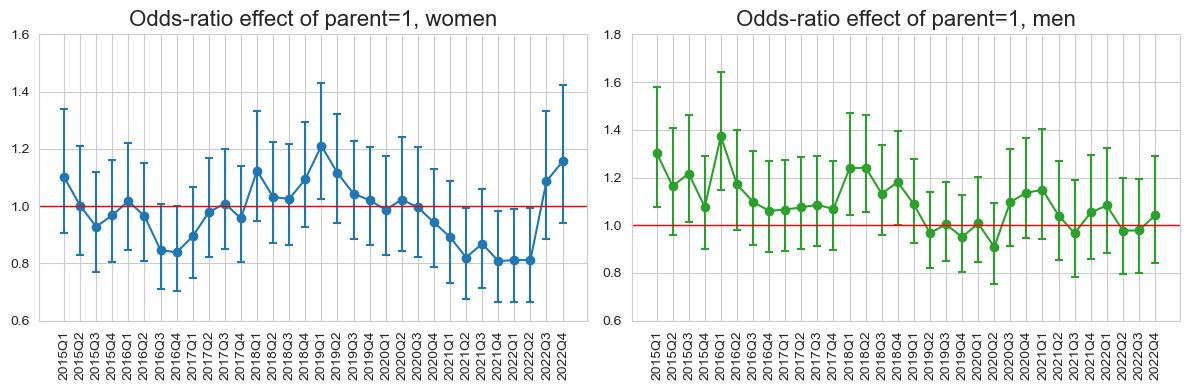

In [21]:
colors = sn.color_palette()
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.title("Odds-ratio effect of parent=1, women",fontsize=16)
plt.plot(qs,coefs_par_a3045_p15,marker='o')
plt.scatter(qs,bounds_par_a3045_p15[:,0],marker='_',color=colors[0])
plt.scatter(qs,bounds_par_a3045_p15[:,1],marker='_',color=colors[0])
for i in range(coefs_par_a3045_p15.size):
    plt.plot((qs[i],qs[i]),(bounds_par_a3045_p15[i,0],bounds_par_a3045_p15[i,1]),c=colors[0])
plt.xticks(rotation=90)
plt.axhline(1,color='r',lw=1)
plt.ylim(0.6,1.6)

plt.subplot(122)
plt.title("Odds-ratio effect of parent=1, men",fontsize=16)
plt.plot(qs,coefs_m_par_a3045_p15,color=colors[2],marker='o')
plt.scatter(qs,bounds_m_par_a3045_p15[:,0],marker='_',color=colors[2])
plt.scatter(qs,bounds_m_par_a3045_p15[:,1],marker='_',color=colors[2])
for i in range(coefs_m_par_a3045_p15.size):
    plt.plot((qs[i],qs[i]),(bounds_m_par_a3045_p15[i,0],bounds_m_par_a3045_p15[i,1]),c=colors[2])
plt.xticks(rotation=90)
plt.axhline(1,color='r',lw=1)
plt.ylim(0.6,1.8)
plt.tight_layout()
# plt.savefig('./plots_logit/prob_womenVmen_parent_time_age3045_parent_15.pdf',format='pdf',bbox_inches='tight')
plt.show()